In [1]:
##ReadingPlottingCSV
##Written by Tim Mose and Rebecca Rapf
##June 1, 2021

###import single file of Langmuir trough data and plot it
###Export plots to png files

##import relevant libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
import csv


##Parameters to be changed for each analysis##
FilePath = "/Users/rebeccarafp/Documents/RapfLabPython/TestData/" ##currently local only, will change to read from google drive
FileName = "210528_1419_MA" #name only not file extension
FileType = "csv" #pick from "xlsx" or "csv"
Surfactant = "myristic" #name of surfactant and/or conditions
StockConc = 1 #(mg/mL) of chloroform stock solution
MM = 284.48 #molecular weight in (g/mol)
VolDeposit_uL = 20 #volume stock solution deposited in 
########

##File-Specific Parameters####
header_length = 43 #skip the first 43 lines in the file
#########

##Constants Library##
AVOGADRO = 6.022*10**23
uL_CONVERSION = 10**6 #number of uL in 1 L
Ang_CONVERSION = 10**10 #number of Angstroms in 1 m
cm_CONVERSION = 10**2 #number of cm in 1 m
cm2_to_Ang2 = Ang_CONVERSION**2/cm_CONVERSION**2
#print(cm2_to_Ang2)
###########

####Calculate number of molecules deposited###
VolDeposit_L = VolDeposit_uL/uL_CONVERSION
AmountDeposit = ((StockConc/MM))*(VolDeposit_L)
NumMolecules = AmountDeposit*AVOGADRO
#print(NumMolecules)

##Set file path to where data is being held locally
os.chdir(FilePath)
print(os.getcwd())


/Users/rebeccarafp/Documents/RapfLabPython/TestData


In [2]:
#####Read in a single Langmuir trough file
###File Handling -- Reads in the file of interest into a Pandas DataFrame ###
if "CleanData" in locals():
    del CleanData #housekeeping for memory reasons

if FileType == "csv":
    CompFile = FileName+"."+FileType
    All=pd.read_csv(CompFile,skiprows = header_length)
elif FileType == "xlsx":
    CompFile = FileName+"."+FileType
    #print(CompFile)
    All=pd.read_excel(CompFile,skiprows = header_length)
    #print("excel")
else:
    print("Unrecognized File Type, choose either 'csv' or 'excel'")

#Renames area column to get rid of formatted superscript issue
CleanData = All.rename(columns={All.columns[3]: "A_cm2"})

#CleanData


In [3]:
CleanData.insert(7, "NumMolecules", NumMolecules)
#inserts column with amount of molecules 

A_Ang2 = (CleanData["A_cm2"]*cm2_to_Ang2)
CleanData.insert(4, "A_Ang2", A_Ang2)

MMA=(CleanData["A_Ang2"]/CleanData["NumMolecules"])
CleanData.insert(9, "Mean Molecular Area", MMA)


#CleanData

In [4]:
AP = pd.DataFrame(CleanData, columns=(["A_cm2", "P1[mN/m]"]))
AP
#I used AP to abbreviate for area and pressure.

,A_cm2,P1[mN/m]
0,243.00,0.5631
1,242.26,0.5422
2,241.01,0.5560
3,239.73,0.5598
4,238.48,0.5568
...,...,...
139,64.83,32.4444
140,63.48,36.3864
141,62.14,32.1682
142,60.73,30.3899


Text(0, 0.5, 'Pressure (mN/m)')

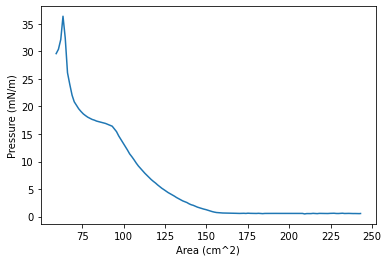

In [5]:
APPlot = AP.plot(x="A_cm2", y="P1[mN/m]",legend = None)

APPlot.set_xlabel('Area (cm^2)')
APPlot.set_ylabel("Pressure (mN/m)")

#This gives the basic plot of just Area and pressure without any changes

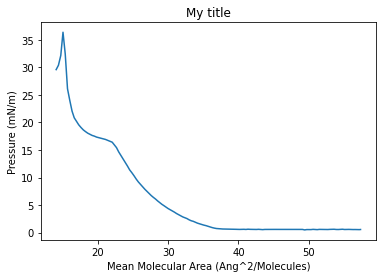

In [6]:
MMAPlot = CleanData.plot(x="Mean Molecular Area", y="P1[mN/m]", legend=None)
#creates plot with axis labels and no legend

MMAPlot.set_xlabel("Mean Molecular Area (Ang^2/Molecules)")
MMAPlot.set_ylabel("Pressure (mN/m)")

plt.title('My title') 
#change value of my title to set the title
plt.savefig('Final_Plot.png', dpi=300, transparent=False, bbox_inches='tight')
#saves the plot in your working directory. Change final plot to name you want
